<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/main/notebooks/RH_CNN_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source 
https://www.kaggle.com/datasets/msambare/fer2013
https://drive.google.com/file/d/168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-/view?usp=sharing 


Downloading data from Google drive 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from struct import unpack
import gzip
from zipfile import ZipFile
import os
%matplotlib inline

#Google lib
from google.colab.patches import cv2_imshow

In [48]:
import PIL
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD

from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import keras

In [2]:
#download the orginal zip file, instated of CSV file 
#zip file download is not recomended, since we have converted zip file into csv file
#and csv file has been saved in google drive
!gdown --id 168XK2dmyPg9d6AI3cgbxhCXdIow7uVK- -O archive.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-
To: /content/archive.zip
100% 63.3M/63.3M [00:00<00:00, 90.1MB/s]


In [66]:
#importing the csv file instated of zip file 
#csv file url: 
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab Notebooks/facial-expression-recognition

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition


In [19]:
#Extracting the data and saving it into list
#need to improve code with how we are extracting "cat"
from zipfile import ZipFile
import matplotlib.image as mpimg
import os
train_data = []
train_dir = '/content/train'
# test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()

for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          train_data.append((emotions[cat], obj, file))

In [22]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 28709
len of one pixel: 2304


In [23]:
print('shape of the traning dataframe: ', df.shape)
print('data type of the pixel: ', type(df.pixels[0]))

shape of the traning dataframe:  (28709, 3)
data type of the pixel:  <class 'numpy.ndarray'>


In [24]:
df.head(2)

,emotion,pixels,dir
0,4,"[248, 247, 173, 125, 136, 144, 152, 154, 154, ...",/content/train/sad/Training_6321346.jpg
1,4,"[135, 103, 100, 116, 113, 110, 114, 114, 111, ...",/content/train/sad/Training_52805848.jpg


In [14]:
df.pixels[0].reshape(48,48)

array([[248, 247, 173, ..., 158, 160, 168],
       [253, 249, 186, ..., 159, 163, 161],
       [254, 254, 184, ..., 153, 157, 172],
       ...,
       [ 36,  42,  92, ...,   2,   0,   0],
       [ 42,  72, 139, ...,   0,   0,   1],
       [ 50, 127, 137, ...,   1,   1,   0]], dtype=uint8)

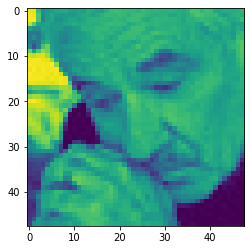

In [16]:
#lets look at one image 
plt.imshow(df.pixels[0].reshape(48,48))

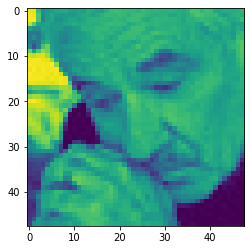

In [25]:
#view an imapge directly from image file 
plt.imshow(mpimg.imread(df.dir[0]))

In [26]:
emotions_label_text = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

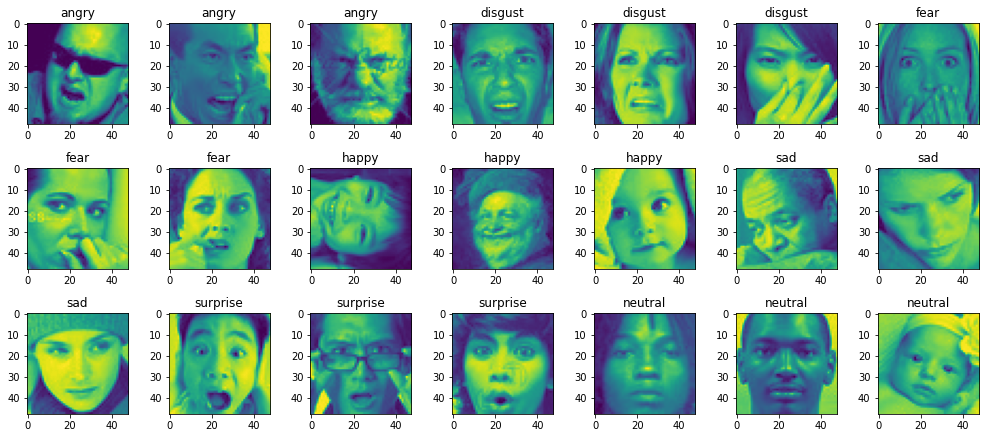

In [28]:
fig = plt.figure(1,(14,14))
x = 0

for label in sorted(df.emotion.unique()):
  for i in range(3):
    img = df[df.emotion == label].pixels.iloc[x]
    img = img.reshape(48,48)
    x +=1

    ax = plt.subplot(7,7,x)
    ax.imshow(img)
    ax.set_title(emotions_label_text[label])
    plt.tight_layout()

# Importing Library


## Importing Basic Python Library

# Data & data visualization

## Importing Data

## Viz

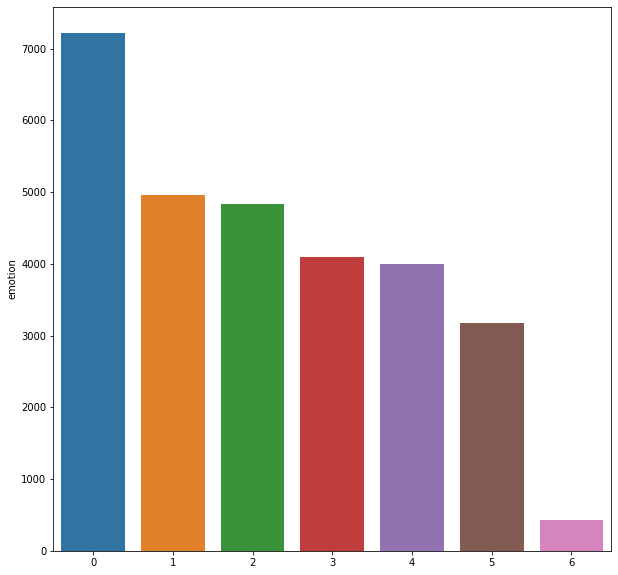

In [30]:
plt.figure(figsize = (10,10))
sns.barplot(x = sorted(df.emotion.value_counts().index), y = df.emotion.value_counts())

In [56]:
train_img = df.pixels.apply(lambda x: x.reshape(48,48,1))

In [57]:
X = np.stack(train_img, axis=0)
y = df.emotion.values

In [59]:
print('shape of our image array: ', X.shape)
print('shape of our labels array: ', y.shape)
# plt.imshow(X[0])
# plt.title(emotions_label_text[y[0]])

shape of our image array:  (28709, 48, 48, 1)
shape of our labels array:  (28709,)


In [60]:
from sklearn.model_selection import train_test_split
#spliting data into test and train 
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [61]:
X_train.shape, X_Test.shape, y_train.shape, y_Test.shape

((25838, 48, 48, 1), (2871, 48, 48, 1), (25838,), (2871,))

In [62]:
# image pre-processing
X_train = X_train/255
X_Test  = X_Test/255

In [63]:
tf_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [64]:
tf_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

In [65]:
tf_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                 loss = "sparse_categorical_crossentropy",
                 metrics = ['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 128)       

In [ ]:
def reshape_date(x):
  return x.reshape(48, 48)


In [ ]:
df['pixels'] = df['pixels'].apply(lambda x: reshape_date(x))

In [ ]:
df.shape

(7178, 3)

In [ ]:
X = df['pixels']
y = to_categorical(df['emotion'])

In [ ]:
X[0]

array([[253, 251, 254, ..., 105,  97,  69],
       [255, 253, 252, ..., 100, 104,  72],
       [252, 251, 253, ...,  94, 105,  81],
       ...,
       [251, 234, 178, ..., 190, 196, 199],
       [254, 226, 179, ..., 187, 194, 198],
       [254, 207, 167, ..., 190, 192, 195]], dtype=uint8)

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X = np.stack(X, axis = 0)

In [ ]:

X = X.reshape(7178, 48, 48, 1)

print(X.shape, y.shape)

(7178, 48, 48, 1) (7178, 7)


In [ ]:
X.shape

(7178, 48, 48, 1)

In [ ]:
#spliting data into test and train 
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [ ]:
# image pre-processing
X_train = X_train/255
X_Test  = X_Test/255

In [ ]:
X_train

array([[[[0.97254902],
         [0.96078431],
         [0.98431373],
         ...,
         [0.97254902],
         [0.97254902],
         [0.96862745]],

        [[0.95686275],
         [0.97254902],
         [0.94901961],
         ...,
         [0.97647059],
         [0.95686275],
         [0.96470588]],

        [[0.96470588],
         [0.98823529],
         [0.78039216],
         ...,
         [0.97254902],
         [0.96470588],
         [0.97647059]],

        ...,

        [[0.10980392],
         [0.13333333],
         [0.1372549 ],
         ...,
         [0.80784314],
         [0.81960784],
         [0.82745098]],

        [[0.12156863],
         [0.1372549 ],
         [0.21176471],
         ...,
         [0.81176471],
         [0.79607843],
         [0.81960784]],

        [[0.14509804],
         [0.14901961],
         [0.25098039],
         ...,
         [0.81960784],
         [0.81568627],
         [0.81568627]]],


       [[[0.88235294],
         [0.87058824],
         [0.88

# PayGroud Start

In [ ]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (48, 48, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

# ML Model's 

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (48, 48, 1), padding = 'same', 
   activation = 'relu', kernel_constraint = maxnorm(3)))

model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', 
   kernel_constraint = maxnorm(3)))

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu', kernel_constraint = maxnorm(3)))
model.add(Dropout(0.5))

model.add(Dense(7, activation = 'softmax'))



In [ ]:
# image pre-processing
X_train = X_train/255
X_Test  = X_Test/255
# X_train, X_Test, y_train, y_Test

In [ ]:
y_train.shape[1]

7

In [ ]:
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr = lrate, momentum = 0.9, decay = decay, nesterov = False)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               9437696   
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#monitor = 'val_loss', min_delta = 0, patience = 0, verbose = 0, mode = 'auto')]

In [ ]:

callbacks = [keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq = 0, batch_size = 32, write_graph = True, write_grads = False, 
                                         write_images = True, embeddings_freq = 0, embeddings_layer_names = None, 
                                         embeddings_metadata = None)]

In [ ]:
model.fit(X_train, y_train, epochs = 60, 
   batch_size = 32,shuffle = True,callbacks = callbacks)

Epoch 1/60
202/202 [==============================] - 68s 333ms/step - loss: 1.8236 - accuracy: 0.2401
Epoch 2/60
202/202 [==============================] - 67s 329ms/step - loss: 1.7540 - accuracy: 0.2833
Epoch 3/60
202/202 [==============================] - 68s 335ms/step - loss: 1.7091 - accuracy: 0.3147
Epoch 4/60
202/202 [==============================] - 66s 326ms/step - loss: 1.6680 - accuracy: 0.3424
Epoch 5/60
202/202 [==============================] - 66s 326ms/step - loss: 1.6334 - accuracy: 0.3607
Epoch 6/60
202/202 [==============================] - 66s 325ms/step - loss: 1.6085 - accuracy: 0.3714
Epoch 7/60
202/202 [==============================] - 66s 325ms/step - loss: 1.5739 - accuracy: 0.3950
Epoch 8/60
202/202 [==============================] - 66s 325ms/step - loss: 1.5494 - accuracy: 0.4031
Epoch 9/60
202/202 [==============================] - 66s 326ms/step - loss: 1.5254 - accuracy: 0.4203
Epoch 10/60
202/202 [==============================] - 66s 326ms/step - l

## Scores

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_train, y_train, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.91%


In [ ]:
# serialize model to JSONx
model_json = model.to_json()
with open("model_face.json", "w") as json_file:
   json_file.write(model_json)

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_Test, y_Test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 40.11%
